# Module 7 - Feature Selection

## 0 - Pairplot

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data_url = "https://raw.githubusercontent.com/benouinirachid/DQDC_2025/refs/heads/main/data/BostonHousing.csv"
df = pd.read_csv(data_url)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<Figure size 700x700 with 0 Axes>

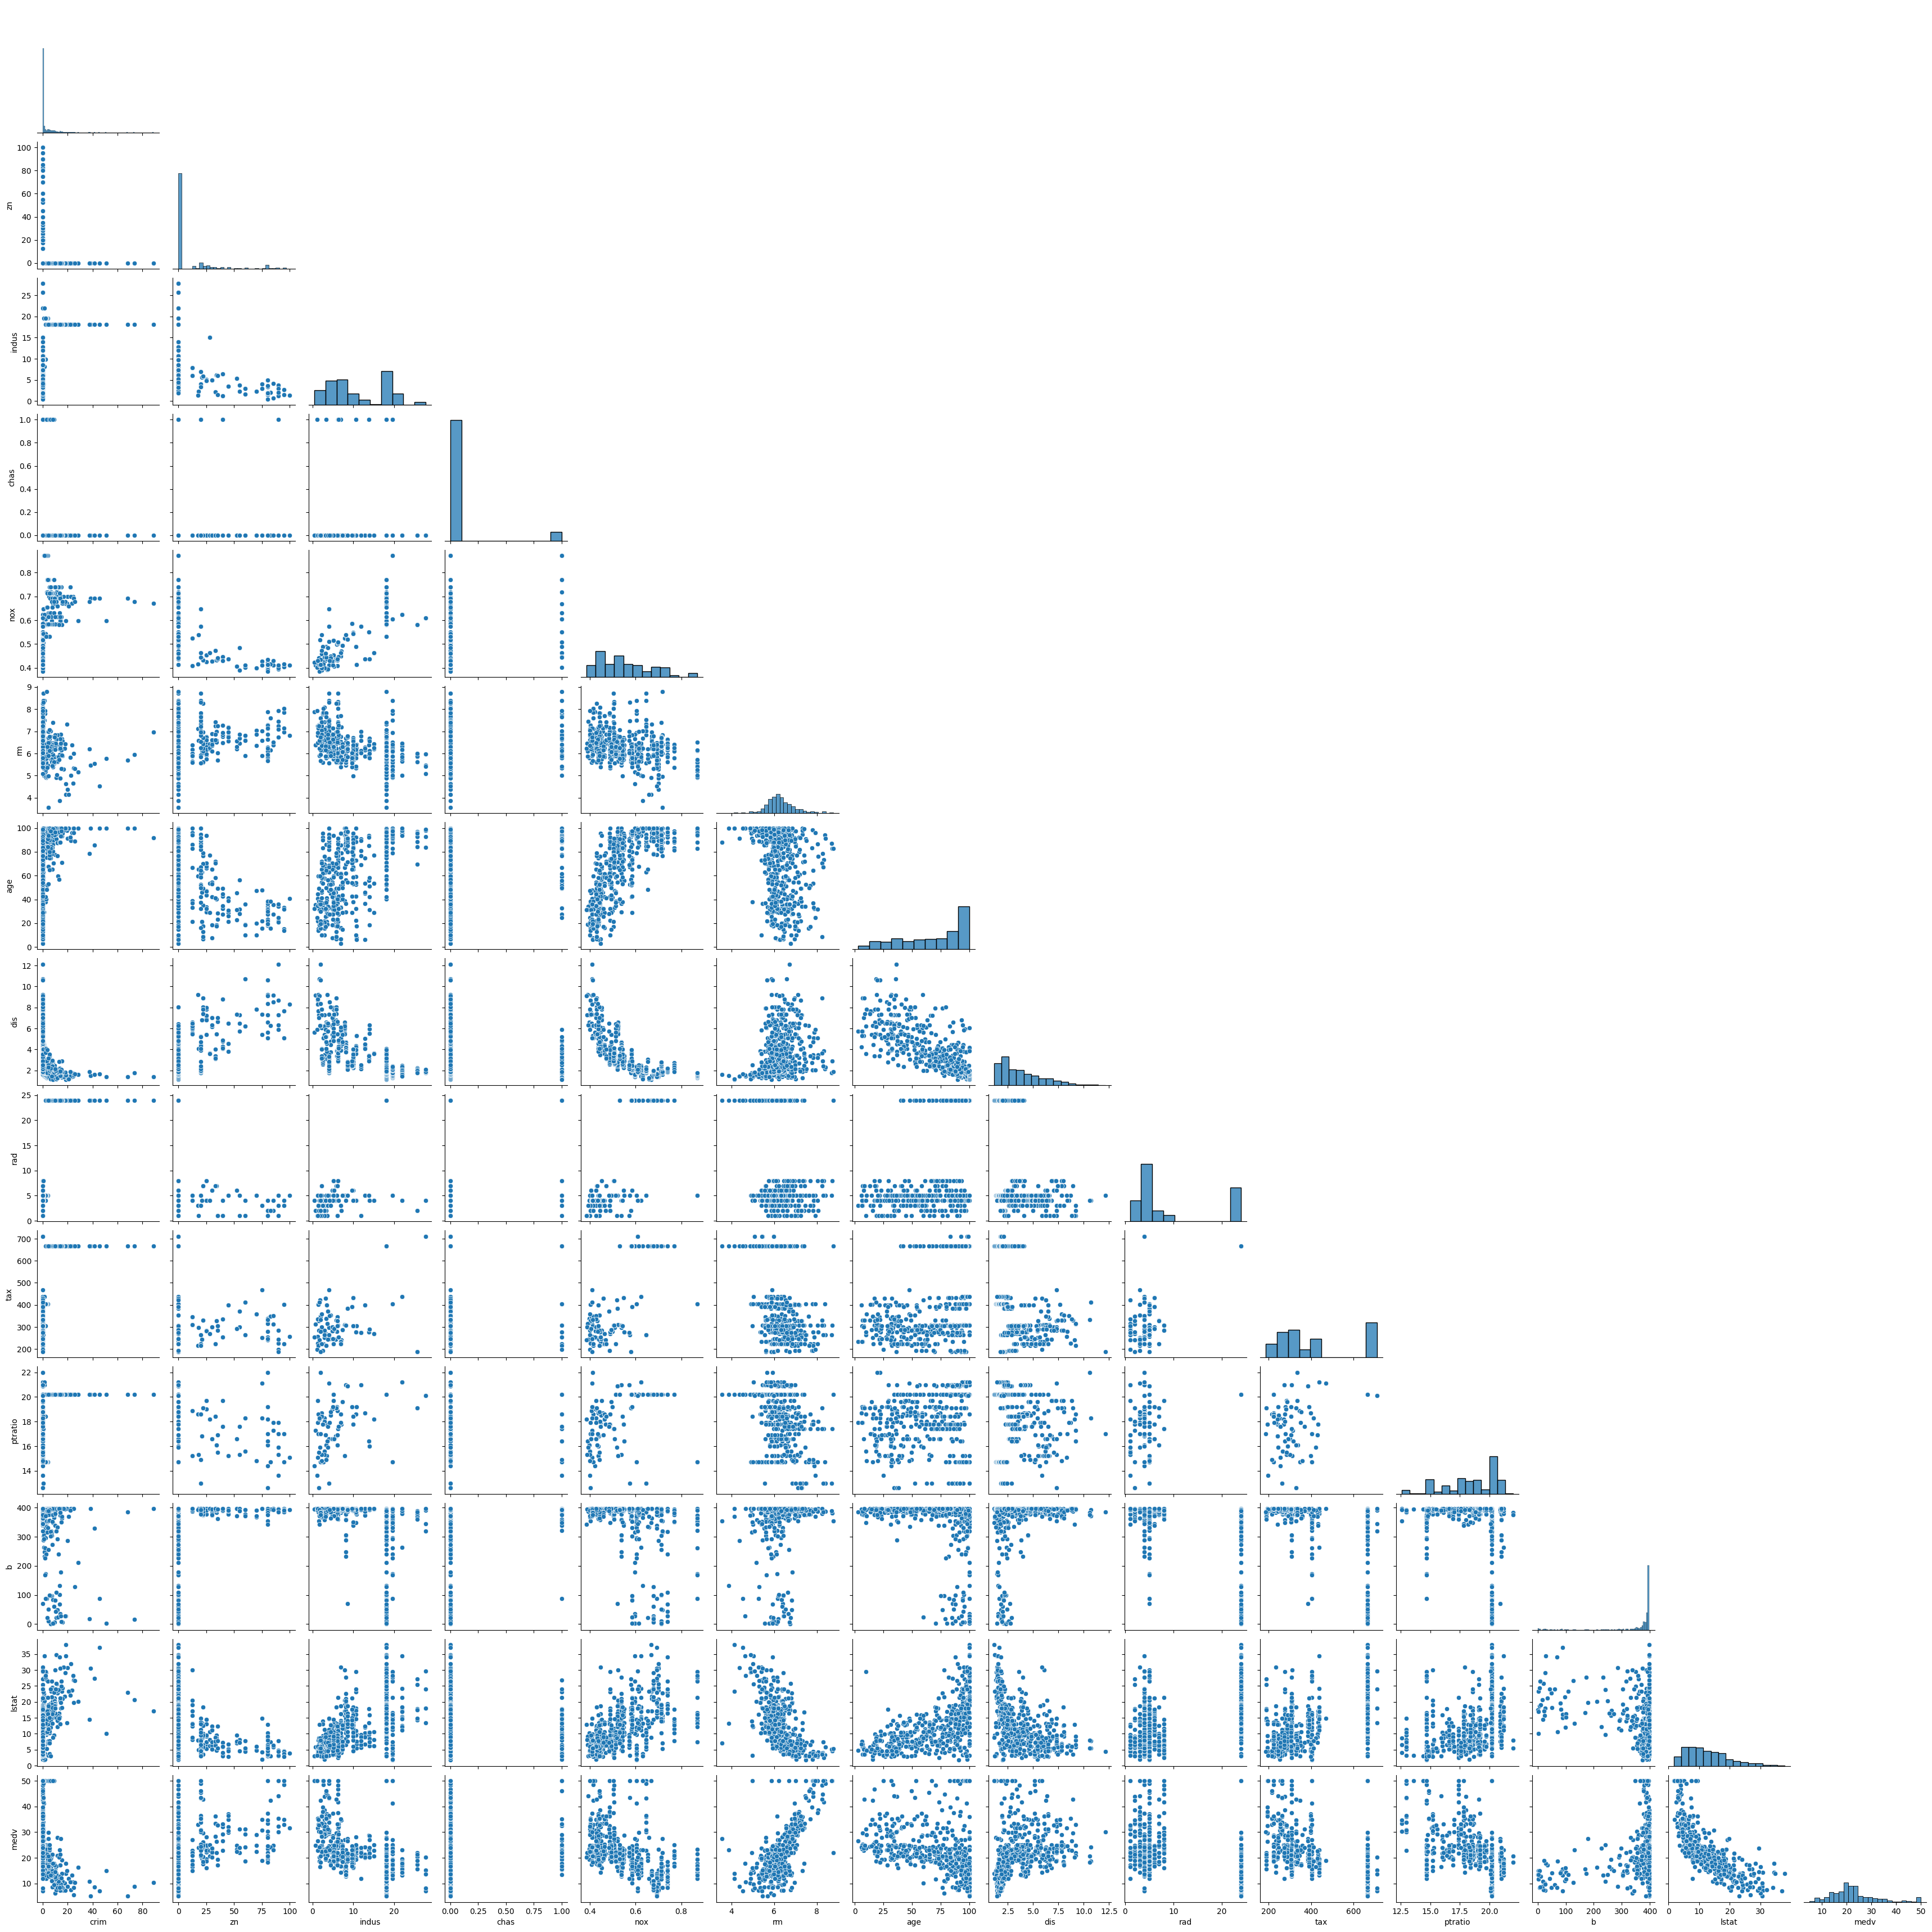

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data_url = "https://raw.githubusercontent.com/benouinirachid/DQDC_2025/refs/heads/main/data/BostonHousing.csv"
df = pd.read_csv(data_url)
plt.figure(figsize=(7, 7), dpi=100)
sns.pairplot(df, corner=True)
plt.show()

## 1 - Correlation

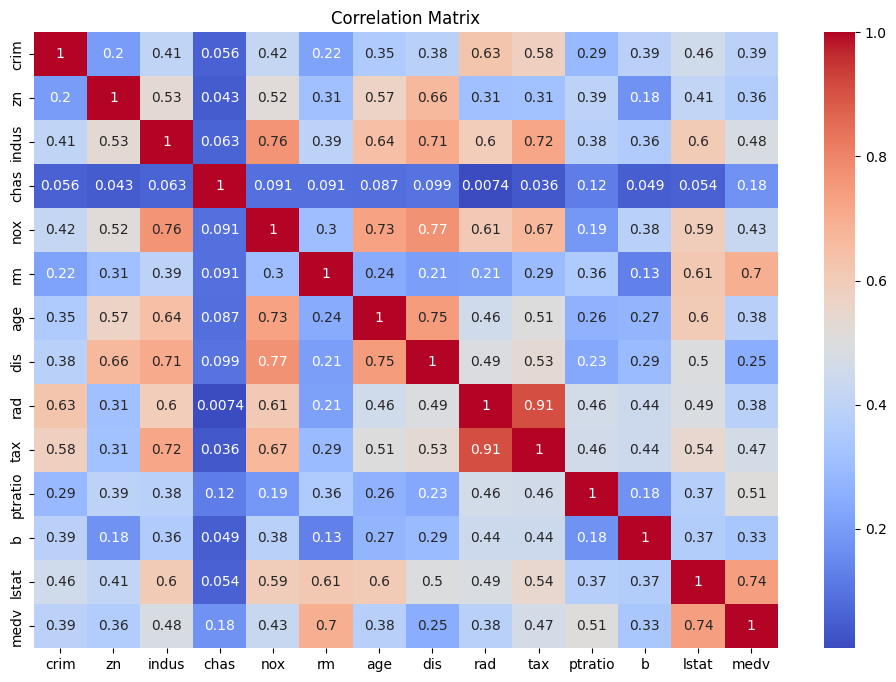

In [17]:
# Correlation matrix
corr_matrix = df.corr().abs()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Drop features with high intercorrelation
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
correlation_threshold = 0.75
to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
print("Columns to be droped:", to_drop)
X_filtered = df.drop(columns=to_drop)

Columns to be droped: ['nox', 'dis', 'tax']


In [24]:
# Selected Features
X_filtered

,crim,zn,indus,chas,rm,age,rad,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,6.575,65.2,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,6.421,78.9,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,7.185,61.1,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,6.998,45.8,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,7.147,54.2,3,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,6.593,69.1,1,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,6.120,76.7,1,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,6.976,91.0,1,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,6.794,89.3,1,21.0,393.45,6.48,22.0


## 2 - Variance

In [25]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Load dataset
data_url = "https://raw.githubusercontent.com/benouinirachid/DQDC_2025/refs/heads/main/data/BostonHousing.csv"
df = pd.read_csv(data_url)
X = df.drop(columns=['medv']) # drop target variable
# Print original shape
print(f"Original shape: {X.shape}")

# Use variance threshold and features with variance < 0.1 will be removed
selector = VarianceThreshold(threshold=0.1)
X_new = selector.fit_transform(X)

# Print new shape and selected features
print(f"Shape after variance threshold: {X_new.shape}")
print("Selected features:")
selected_features = X.columns[selector.get_support()]
print(list(selected_features))

Original shape: (506, 13)
Shape after variance threshold: (506, 11)
Selected features:
['crim', 'zn', 'indus', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']


In [26]:
selector.variances_

array([7.38403597e+01, 5.42861840e+02, 4.69714297e+01, 6.43854770e-02,
       1.34010989e-02, 4.92695216e-01, 7.90792473e+02, 4.42525226e+00,
       7.56665313e+01, 2.83486236e+04, 4.67772630e+00, 8.31828042e+03,
       5.08939794e+01])

## 3 - Chi2

In [68]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = load_breast_cancer()
X, y = data.data, data.target
# Scale the features to a range between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Apply Chi-Square test
chi2_scores, p_values = chi2(X_scaled, y)

# Create a DataFrame for better visualization
feature_scores = pd.DataFrame({
    'Feature': data.feature_names,
    'Chi2_score': chi2_scores,
    'P_value': np.round(p_values,6)
    })
feature_scores = feature_scores.sort_values(by='Chi2_score', ascending=False)
print(feature_scores)
# Select features based on p-values or Chi2 scores
# Example: Select features with p-value < 0.05
selected_features = feature_scores[
    feature_scores['P_value'] < 0.05
    ]['Feature'].tolist()
print("\nSelected Features:",selected_features)


                    Feature  Chi2_score   P_value
7       mean concave points   52.405743  0.000000
27     worst concave points   46.341648  0.000000
6            mean concavity   46.186395  0.000000
23               worst area   35.043882  0.000000
22          worst perimeter   34.438091  0.000000
20             worst radius   34.124937  0.000000
26          worst concavity   31.563031  0.000000
3                 mean area   29.328594  0.000000
2            mean perimeter   26.528902  0.000000
0               mean radius   24.897293  0.000001
25        worst compactness   20.992541  0.000005
5          mean compactness   20.353176  0.000006
13               area error   19.676975  0.000009
10             radius error   17.324128  0.000032
12          perimeter error   16.044344  0.000062
21            worst texture    8.741628  0.003110
1              mean texture    6.394071  0.011450
17     concave points error    5.781996  0.016191
24         worst smoothness    5.675733  0.017201


In [69]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
# Load the data
data = load_breast_cancer()
X, y = data.data, data.target
# Scale the features to a range between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Select top k=20 features based on Chi2 scores
selector = SelectKBest(chi2, k=20)
selector.fit(X_scaled, y)
X_new = selector.transform(X_scaled)

In [70]:
scores = pd.DataFrame({"feature": data.feature_names,
              "chi2": selector.scores_,
              "pvalue":np.round(selector.pvalues_,5),
              "selected":selector.get_support()})
scores.sort_values(by="chi2", ascending=False)

,feature,chi2,pvalue,selected
7,mean concave points,52.405743,0.00000,True
27,worst concave points,46.341648,0.00000,True
6,mean concavity,46.186395,0.00000,True
23,worst area,35.043882,0.00000,True
22,worst perimeter,34.438091,0.00000,True
20,worst radius,34.124937,0.00000,True
26,worst concavity,31.563031,0.00000,True
3,mean area,29.328594,0.00000,True
2,mean perimeter,26.528902,0.00000,True
0,mean radius,24.897293,0.00000,True


## 4 - ANOVA F-Test

In [71]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
# Load the data
data = load_breast_cancer()
X, y = data.data, data.target
# Scale the features to a range between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Select top k=20 features based on ANOVA-F scores
selector = SelectKBest(f_classif, k=20)
selector.fit(X_scaled, y)
X_new = selector.transform(X_scaled)

In [73]:
scores = pd.DataFrame({"feature": data.feature_names,
              "anova-f": selector.scores_,
              "pvalue":np.round(selector.pvalues_,5),
              "selected":selector.get_support()})
scores.sort_values(by="anova-f", ascending=False)

,feature,anova-f,pvalue,selected
27,worst concave points,964.385393,0.00000,True
22,worst perimeter,897.944219,0.00000,True
7,mean concave points,861.676020,0.00000,True
20,worst radius,860.781707,0.00000,True
2,mean perimeter,697.235272,0.00000,True
23,worst area,661.600206,0.00000,True
0,mean radius,646.981021,0.00000,True
3,mean area,573.060747,0.00000,True
6,mean concavity,533.793126,0.00000,True
26,worst concavity,436.691939,0.00000,True


## 5 - Information Gain

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import mutual_info_classif

In [35]:
# Load the data
data = load_breast_cancer()
X, y = data.data, data.target
# Calculate the information gain for each feature
ig = mutual_info_classif(X, y)
ig

array([0.3658457 , 0.09719055, 0.40214733, 0.3611009 , 0.07634922,
       0.21187574, 0.37467452, 0.44066122, 0.06570252, 0.01087249,
       0.24918869, 0.00122298, 0.27779869, 0.33924633, 0.01576275,
       0.0747771 , 0.11708823, 0.13211119, 0.01236105, 0.03939295,
       0.45430407, 0.1205035 , 0.47755645, 0.46379581, 0.09827652,
       0.22442388, 0.31627812, 0.4363403 , 0.09363114, 0.06450735])

In [37]:
# Create a dictionary to store the feature and its information gain
ig_dict = {}
for i in range(len(data.feature_names)):
    ig_dict[data.feature_names[i]] = ig[i]
# Sort the dictionary by the information gain in descending order
ig_dict_sorted = dict(sorted(ig_dict.items(), key=lambda item: item[1], reverse=True))

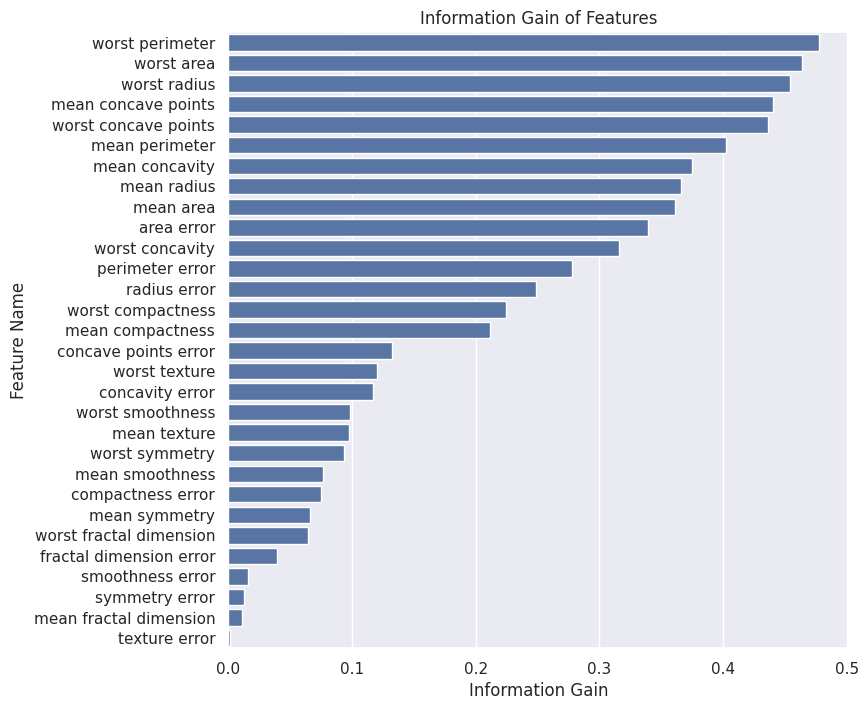

In [38]:
# Visualize the information gain of each feature
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(8,8)})
sns.barplot(x=list(ig_dict_sorted.values()), y=list(ig_dict_sorted.keys()))
plt.title('Information Gain of Features')
plt.xlabel('Information Gain')
plt.ylabel('Feature Name')
plt.show()

In [39]:
# Select the top n features with the highest information gain
n = 5
selected_features = list(ig_dict_sorted.keys())[:n]

# Print the selected features
print('Selected Features:')
print(selected_features)

Selected Features:
[np.str_('worst perimeter'), np.str_('worst area'), np.str_('worst radius'), np.str_('mean concave points'), np.str_('worst concave points')]


## 6 - Forward Feature Selection

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Load data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Forward Selection
lr = LogisticRegression(max_iter=1000)

sfs_forward = SFS(lr,
                   k_features=10,
                   forward=True,
                   floating=False,
                   scoring='accuracy',
                   cv=5,
                   verbose=2)

sfs_forward.fit(X_train, y_train)


[2025-04-14 21:14:42] Features: 1/10 -- score: 0.9019303797468355
[2025-04-14 21:14:43] Features: 2/10 -- score: 0.9395886075949367
[2025-04-14 21:14:45] Features: 3/10 -- score: 0.944620253164557
[2025-04-14 21:14:46] Features: 4/10 -- score: 0.9496202531645569
[2025-04-14 21:14:48] Features: 5/10 -- score: 0.9496202531645569
[2025-04-14 21:14:50] Features: 6/10 -- score: 0.9496202531645569
[2025-04-14 21:14:54] Features: 7/10 -- score: 0.9496202531645569
[2025-04-14 21:14:57] Features: 8/10 -- score: 0.9496202531645569
[2025-04-14 21:14:59] Features: 9/10 -- score: 0.9496202531645569
[2025-04-14 21:15:02] Features: 10/10 -- score: 0.9496202531645569

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=1000),
                          k_features=(10, 10), scoring='accuracy', verbose=2)

In [12]:
# Print results
print("Features selected by Forward Selection:")
for feature_idx in sfs_forward.k_feature_idx_:
    print(X.columns[feature_idx])

Features selected by Forward Elimination:
mean radius
mean perimeter
mean smoothness
mean fractal dimension
texture error
smoothness error
compactness error
concavity error
worst texture
worst perimeter


In [20]:
# Evaluate performance
X_train_sfs = sfs_forward.transform(X_train)
X_test_sfs = sfs_forward.transform(X_test)

lr.fit(X_train_sfs, y_train)
y_pred = lr.predict(X_test_sfs)
print(f"Accuracy with selected features: {accuracy_score(y_test, y_pred):.4f}")

Accuracy with selected features: 0.9708


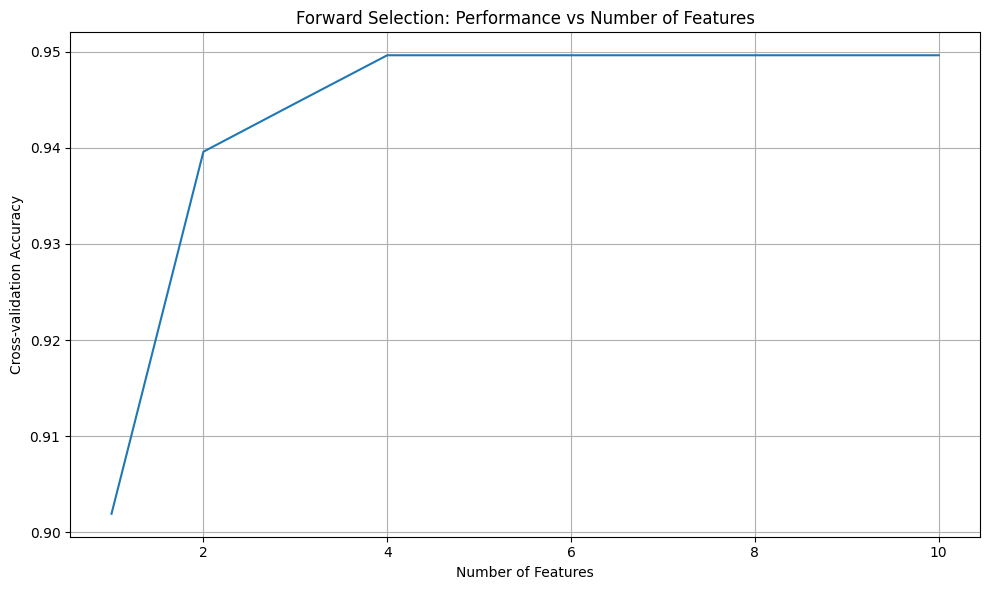

In [19]:
# Plot performance vs number of features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sfs_forward.subsets_) + 1),
         [subset['avg_score'] for subset in sfs_forward.subsets_.values()])
plt.xlabel('Number of Features')
plt.ylabel('Cross-validation Accuracy')
plt.title('Forward Selection: Performance vs Number of Features')
plt.grid()
plt.tight_layout()

## 7 - Backward Feature Elimination

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Load data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

# backward Selection
lr = LogisticRegression(max_iter=200)

sfs_backward = SFS(lr,
                   k_features=10,
                   forward=False,
                   floating=False,
                   scoring='accuracy',
                   cv=5,
                   verbose=2)

sfs_backward.fit(X_train, y_train)


[2025-04-14 21:34:56] Features: 29/10 -- score: 0.9496835443037973
[2025-04-14 21:35:02] Features: 28/10 -- score: 0.9496835443037973
[2025-04-14 21:35:07] Features: 27/10 -- score: 0.9496835443037973
[2025-04-14 21:35:11] Features: 26/10 -- score: 0.9496835443037973
[2025-04-14 21:35:16] Features: 25/10 -- score: 0.9521835443037976
[2025-04-14 21:35:21] Features: 24/10 -- score: 0.9496835443037973
[2025-04-14 21:35:25] Features: 23/10 -- score: 0.9496835443037973
[2025-04-14 21:35:29] Features: 22/10 -- score: 0.9522151898734176
[2025-04-14 21:35:33] Features: 21/10 -- score: 0.9522151898734176
[2025-04-14 21:35:36] Features: 20/10 -- score: 0.9522151898734176
[2025-04-14 21:35:41] Features: 19/10 -- score: 0.9522151898734176
[2025-04-14 21:35:44] Features: 18/10 -- score: 0.9522151898734176
[2025-04-14 21:35:47] Features: 17/10 -- score: 0.9522151898734176
[2025-04-14 21:35:49] Features: 16/10 -- score: 0.9522151898734176
[2025-04-14 21:35:53] Features: 15/10 -- score: 0.95715189873

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=200),
                          forward=False, k_features=(10, 10),
                          scoring='accuracy', verbose=2)

In [32]:
# Print results
print("Features selected by Backward Elimination:")
for feature_idx in sfs_backward.k_feature_idx_:
    print(X.columns[feature_idx])

Features selected by Backward Elimination:
mean radius
mean texture
mean perimeter
mean area
mean smoothness
mean compactness
mean concavity
texture error
area error
worst texture


In [33]:
# Evaluate performance
X_train_sfs = sfs_backward.transform(X_train)
X_test_sfs = sfs_backward.transform(X_test)

lr.fit(X_train_sfs, y_train)
y_pred = lr.predict(X_test_sfs)
print(f"Accuracy with selected features: {accuracy_score(y_test, y_pred):.4f}")

Accuracy with selected features: 0.9591


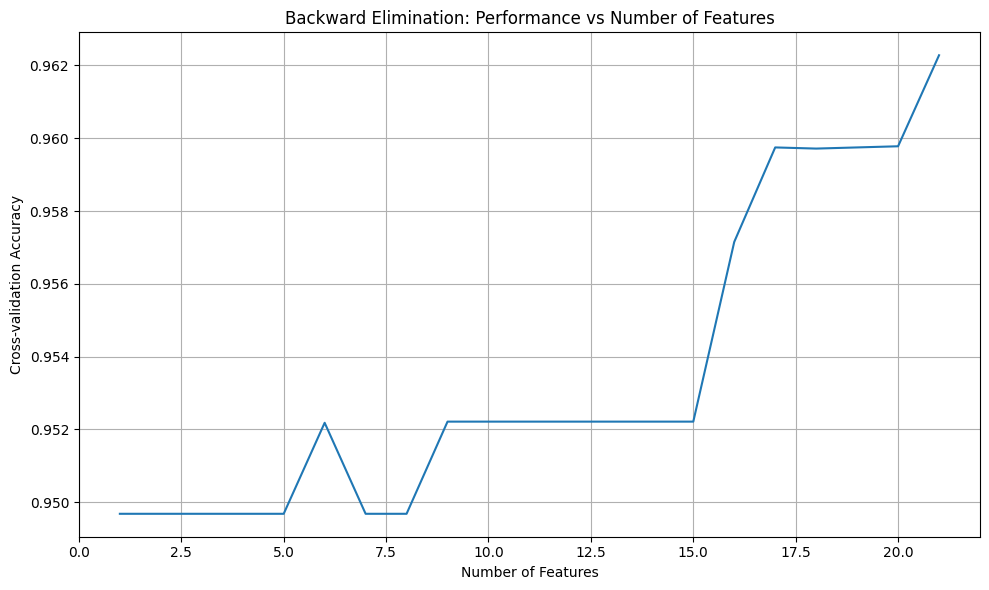

In [34]:
# Plot performance vs number of features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sfs_backward.subsets_) + 1),
         [subset['avg_score'] for subset in sfs_backward.subsets_.values()])
plt.xlabel('Number of Features')
plt.ylabel('Cross-validation Accuracy')
plt.title('Backward Elimination: Performance vs Number of Features')
plt.grid()
plt.tight_layout()

## 9 - LASSO

Features selected by LASSO (non-zero coefficients):
                 Feature  Coefficient
27  worst concave points    -0.154851
20          worst radius    -0.110872
7    mean concave points    -0.043137
21         worst texture    -0.009914


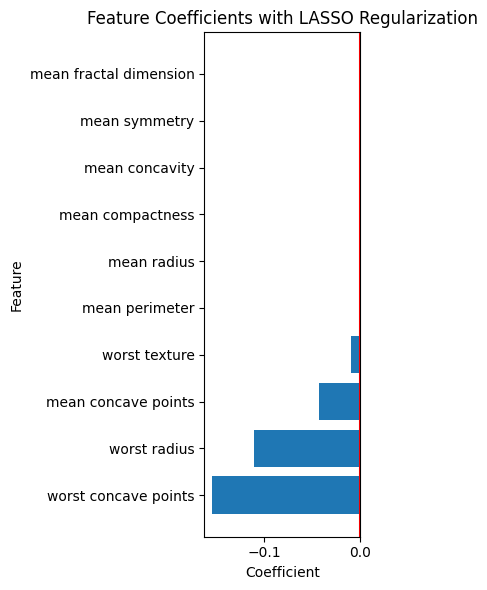

In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# Load data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply LASSO (Alpha controls regularization strength)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Get feature coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})
coef_df = coef_df.sort_values(by=['Coefficient'], key=abs, ascending=False)

# Print features with non-zero coefficients
print("Features selected by LASSO (non-zero coefficients):")
selected_features = coef_df[coef_df['Coefficient'] != 0]
print(selected_features)

# Visualize coefficients
plt.figure(figsize=(4, 6))
plt.barh(coef_df['Feature'][:10], coef_df['Coefficient'][:10])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients with LASSO Regularization')
plt.axvline(x=0, color='r', linestyle='-')
plt.tight_layout()

## 10 - Elastic Net

Features selected by Elastic Net (non-zero coefficients):
                 Feature  Coefficient
27  worst concave points    -0.110986
20          worst radius    -0.093470
7    mean concave points    -0.078573
21         worst texture    -0.044836
22       worst perimeter    -0.042103
26       worst concavity    -0.016366
28        worst symmetry    -0.015971


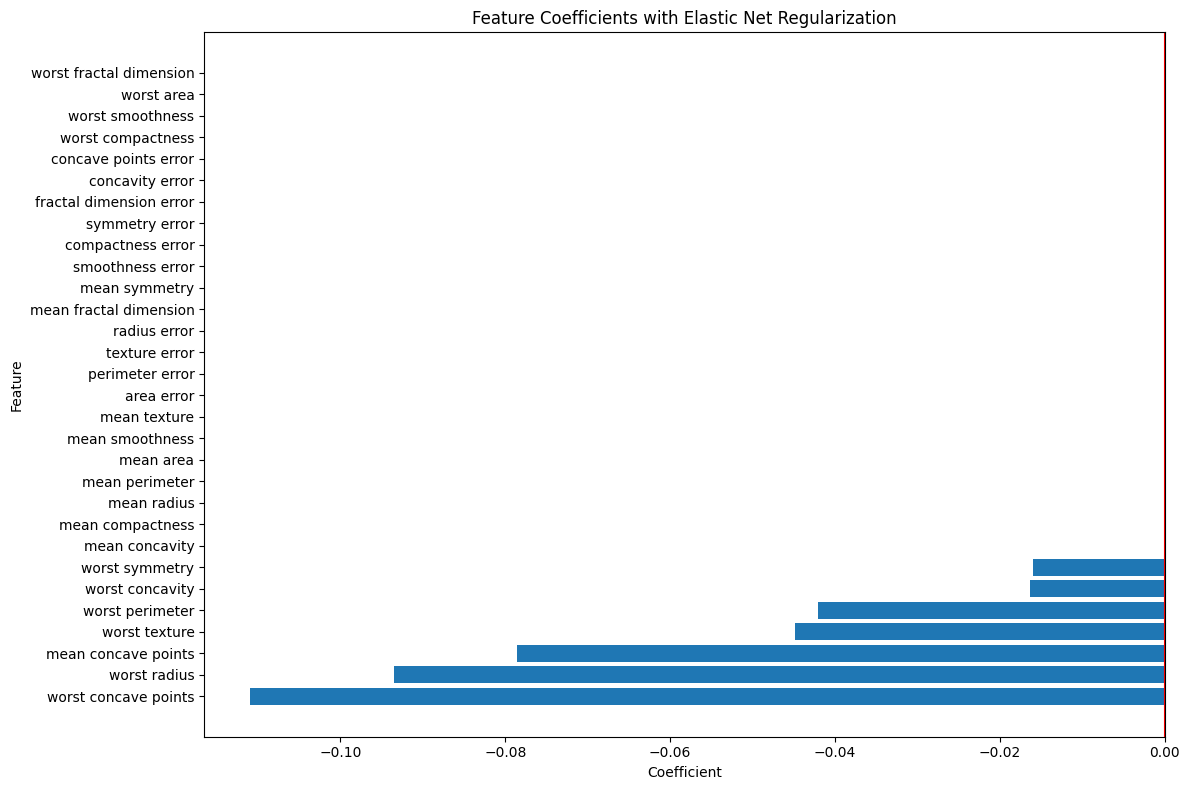

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt

# Load data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Elastic Net
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio controls the mix of L1 and L2
elastic.fit(X_train_scaled, y_train)

# Get feature coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': elastic.coef_
})
coef_df = coef_df.sort_values(by=['Coefficient'], key=abs, ascending=False)

# Print features with non-zero coefficients
print("Features selected by Elastic Net (non-zero coefficients):")
selected_features = coef_df[coef_df['Coefficient'] != 0]
print(selected_features)

# Visualize coefficients
plt.figure(figsize=(12, 8))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients with Elastic Net Regularization')
plt.axvline(x=0, color='r', linestyle='-')
plt.tight_layout()

## 11 - Tree-based Importance

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

# Print top features
print("Top 10 features by importance:")
print(importances.head(10))


Top 10 features by importance:
                 Feature  Importance
7    mean concave points    0.141934
27  worst concave points    0.127136
23            worst area    0.118217
6         mean concavity    0.080557
20          worst radius    0.077975
22       worst perimeter    0.074292
2         mean perimeter    0.060092
3              mean area    0.053810
26       worst concavity    0.041080
0            mean radius    0.032312


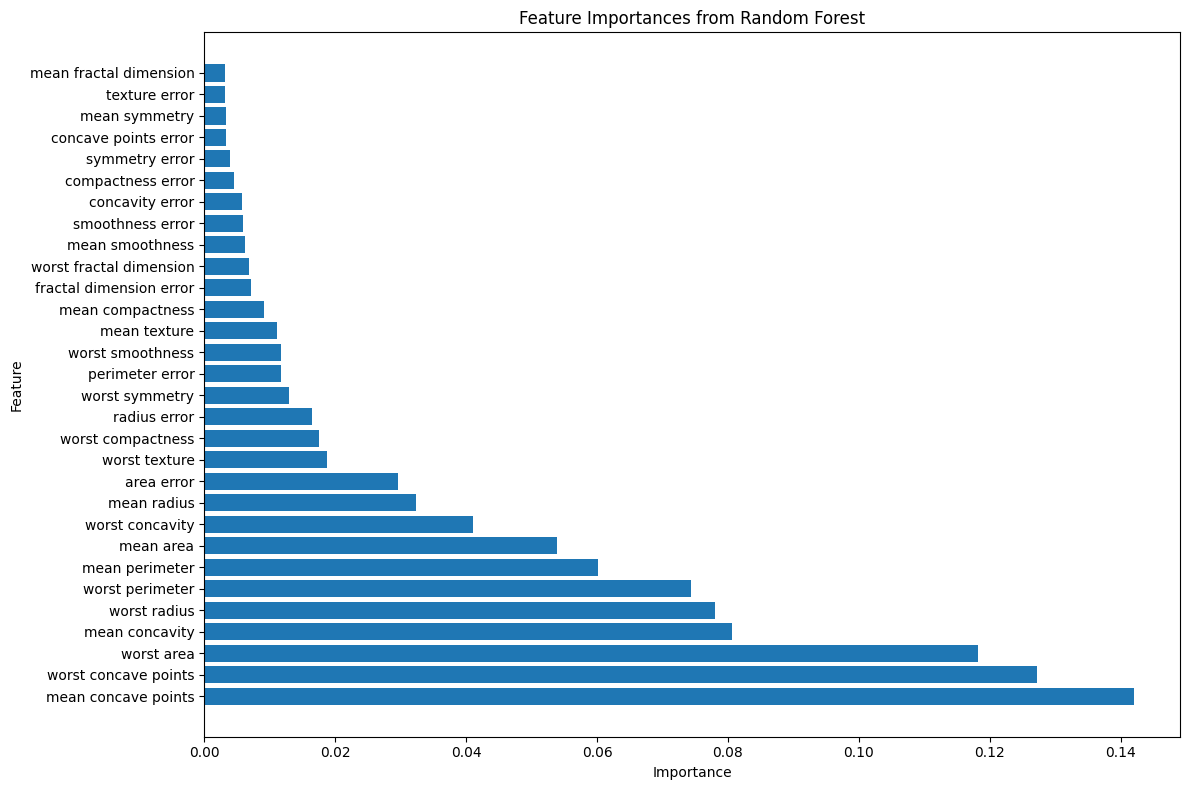

In [14]:
# Visualize importances
plt.figure(figsize=(12, 8))
plt.barh(importances['Feature'], importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.tight_layout()

In [6]:
# Select top features
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(rf, threshold='median')
X_selected = selector.fit_transform(X, y)
print(f"Original features: {X.shape[1]}")
print(f"Selected features: {X_selected.shape[1]}")

# Get names of selected features
mask = selector.get_support()
selected_features = X.columns[mask]
print("Selected feature names:")
print(list(selected_features))

Original features: 30
Selected features: 15
Selected feature names:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'radius error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points']


## Machine learning Example

In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.metrics import accuracy_score

# Load the data
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Baseline model: use all features
clf_full = LogisticRegression(max_iter=5000)
clf_full.fit(X_train, y_train)
y_pred_full = clf_full.predict(X_test)
print("Accuracy with all features:", accuracy_score(y_test, y_pred_full))

# Apply feature selection: keep top 10 features based on ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train model with selected features
clf_selected = LogisticRegression(max_iter=5000)
clf_selected.fit(X_train_selected, y_train)
y_pred_selected = clf_selected.predict(X_test_selected)
print("Accuracy with top 10 features:", accuracy_score(y_test, y_pred_selected))

Accuracy with all features: 0.965034965034965
Accuracy with top 10 features: 0.972027972027972
